In [7]:
# data loading
import PIL.Image 
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1/255)
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('dataset/train/', class_mode='categorical', target_size=(128, 128))
test_it = datagen.flow_from_directory('dataset/test/', class_mode='categorical', target_size=(128, 128))
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.
Batch shape=(32, 128, 128, 3), min=0.000, max=1.000


In [8]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception

## Loading Xception model-
base_model = Xception(weights=None, include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False ## Not trainable weights

In [9]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(6, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


history = model.fit(train_it, epochs=10, validation_data=test_it, verbose = 1)

Epoch 1/10
341/341 [==============================] - 400s 1s/step - loss: 1.4141 - accuracy: 0.3774 - val_loss: 1.4111 - val_accuracy: 0.3792
Epoch 2/10
341/341 [==============================] - 356s 1s/step - loss: 1.3708 - accuracy: 0.3987 - val_loss: 1.3696 - val_accuracy: 0.4081
Epoch 3/10
341/341 [==============================] - 330s 969ms/step - loss: 1.2924 - accuracy: 0.4868 - val_loss: 1.2609 - val_accuracy: 0.5389
Epoch 4/10
341/341 [==============================] - 331s 969ms/step - loss: 1.1960 - accuracy: 0.5560 - val_loss: 1.1772 - val_accuracy: 0.5701
Epoch 5/10
341/341 [==============================] - 314s 921ms/step - loss: 1.1152 - accuracy: 0.5797 - val_loss: 1.1052 - val_accuracy: 0.5723
Epoch 6/10
341/341 [==============================] - 331s 970ms/step - loss: 1.0575 - accuracy: 0.5922 - val_loss: 1.0581 - val_accuracy: 0.5934
Epoch 7/10
341/341 [==============================] - 318s 933ms/step - loss: 1.0188 - accuracy: 0.6046 - val_loss: 1.0267 - val_a

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 50)                1638450   
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 6)                 126       
                                                                 
Total params: 22,501,076
Trainable params: 1,639,596
Non-trainable params: 20,861,480
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


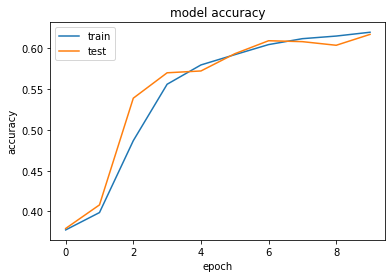

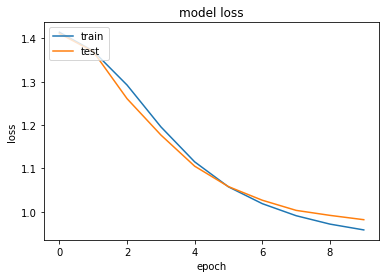

In [14]:
import matplotlib.pyplot as plt
import numpy
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_it, test_it.samples // test_it.batch_size + 1, verbose = 1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cf = confusion_matrix(test_it.classes, y_pred)
print(confusion_matrix(test_it.classes, y_pred))
print('Classification Report')
target_names = ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
print(classification_report(test_it.classes, y_pred, target_names=target_names))

85/85 [==============================] - 54s 621ms/step
Confusion Matrix
[[  2  65  60 133  86  49]
 [  6  57  54 124  85  55]
 [  5  57  63 114  91  58]
 [  5  81  98 197 134  86]
 [  6  73  82 172 123  74]
 [  6  60  44 123 120  50]]
Classification Report
               precision    recall  f1-score   support

  freshapples       0.07      0.01      0.01       395
  freshbanana       0.15      0.15      0.15       381
 freshoranges       0.16      0.16      0.16       388
 rottenapples       0.23      0.33      0.27       601
 rottenbanana       0.19      0.23      0.21       530
rottenoranges       0.13      0.12      0.13       403

     accuracy                           0.18      2698
    macro avg       0.15      0.17      0.15      2698
 weighted avg       0.16      0.18      0.17      2698



<AxesSubplot:>

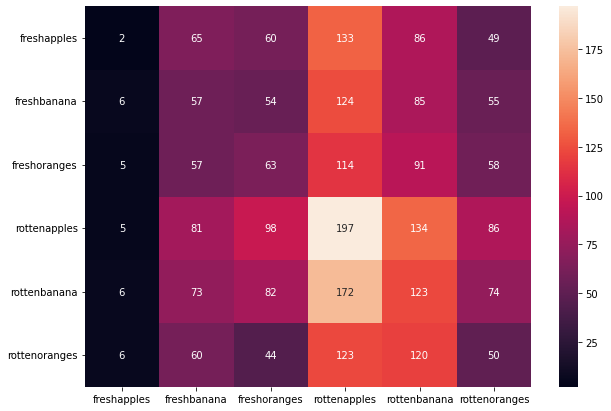

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cf, index = [i for i in target_names], columns= [i for i in target_names])

plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt='g')